In [45]:
from mapping import column_descriptions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import iqr
import xgboost as xgb

from scipy import stats
from scipy.stats import norm, skew

warnings.filterwarnings("ignore")

onefig_size = (10, 4)
multifigs_size = (12, 4)

# Dataset Overview
The dataset includes 1460 rows and 81 columns. Each row represents a house and each column represents a feature of the house. The target column is 'SalePrice'. Here are 20/81 of the key features:

- **SalePrice (Target Variable)**: This column is essential for your analysis as it represents the property's sale price that you're trying to predict.

- **OverallQual**: This column represents the overall material and finish quality of the property. It can be a significant factor in determining the sale price.

- **GrLivArea**: The above-grade living area in square feet can have a significant impact on the property's value.

- **GarageCars**: The size of the garage in terms of car capacity can be an important feature affecting the property's price.

- **TotalBsmtSF**: The total square feet of the basement area can also play a crucial role in determining the property's value.

- **1stFlrSF**: The square footage of the first floor can be a valuable feature in estimating the property's price.

- **FullBath**: The number of full bathrooms above grade can be an influential factor for potential buyers.

- **TotRmsAbvGrd**: The total number of rooms above grade (excluding bathrooms) can provide insight into the property's size and functionality.

- **YearBuilt**: The original construction date of the property can affect its value, considering factors such as architectural style and historical significance.

- **YearRemodAdd**: The remodel date can indicate if any recent renovations or improvements were made, which can impact the property's price.

- **Neighborhood**: The physical location within Ames city limits can have a significant influence on property values based on factors like amenities, schools, and desirability.

- **MasVnrArea**: The masonry veneer area in square feet can add aesthetic value to the property and impact its price.

- **GarageArea**: The size of the garage in square feet is another essential factor to consider.

- **BsmtFinSF1**: The type 1 finished square feet of the basement area can contribute to the property's value.

- **OpenPorchSF**: The square footage of the open porch area can enhance the property's appeal and potentially increase its value.

- **WoodDeckSF**: The area of the wood deck in square feet can be an attractive feature for buyers and impact the property's price.

- **2ndFlrSF**: The square footage of the second floor can provide additional living space and influence the property's value.

- **HalfBath**: The number of half baths above grade can be a useful feature for buyers and affect the property's price.

- **LotArea**: The size of the lot in square feet can be a relevant factor in determining the property's value.

- **KitchenQual**: The quality of the kitchen can significantly impact the property's desirability and price.,

- **...**

In [46]:
file_path = 'data/house_pricing_train.csv'

original_df = pd.read_csv(file_path)

print(original_df.head())
print("Number of rows:", original_df.shape[0])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [47]:
original_df.info()
# listing categorical and numerical columns
categorical_columns = original_df.select_dtypes(include=['object']).columns
numerical_columns = original_df.select_dtypes(exclude=['object']).columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
set(original_df['YearRemodAdd'])

{1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010}

-----------------------------------------------------------------------
Next we find the categorical variables among the numerical columns. We can identify categorical variables by checking the ratio of unique values to the total number of values in a column. If this ratio is below a certain threshold, we can consider the column as categorical. In this case, we set the threshold to 0.05 (5%).
And then change the data type of these columns to 'object'.

In [49]:
data_types = original_df.dtypes

# Identify columns with numeric data types
numeric_columns = data_types[data_types != 'object'].index.tolist()

# Identify categorical variables among the numeric columns
categorical_vars = []
for column in numeric_columns:
    unique_values = original_df[column].nunique()
    total_values = len(original_df[column])
    if unique_values / total_values < 0.05:  # Set a threshold for categorical variables
        categorical_vars.append(column)

# Print the categorical variables
print("Categorical Variables (Numeric):")
print(categorical_vars)

# Change the data type of these columns to 'object'
original_df[categorical_vars] = original_df[categorical_vars].astype('object')

Categorical Variables (Numeric):
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


----------------------------------------------------------------------- 
Remove id column because it is not useful for the analysis.

In [50]:
original_df.drop('Id', axis=1, inplace=True)
original_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

-----------------------------------------------------------------------
Next, let's find out more information about the numerical variables:

In [51]:
original_df.describe()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1201.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,24.284752,9981.264932,30.202904,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,21.000000,1300.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


LotFrontage has a range of values from 21 to 313.0,
MasVnrArea has a range of values from 0 to 1600.0,
GarageYrBlt has a range of values from 1900 to 2010.
...

These columns have outliers, which can affect the model's performance. We will handle these outliers in the data preprocessing step.


-----------------------------------------------------------------------
## Data Cleaning

At first, we make a copy of the original dataframe to keep the original data unchanged.

In [52]:
df = original_df.copy()

# Data duplication

In [53]:
dup_ind = df.duplicated()
df[dup_ind]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There is no duplicated row in the dataset.

# Missing values

In [54]:
df.isnull().sum() * 100 / df.shape[0]

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

We can see that there are many columns with missing values.

In [55]:
print(set(df['Alley']))
print(set(df['PoolQC']))
print(set(df['Fence']))
print(set(df['MiscFeature']))
print(set(df['GarageCond']))
print(set(df['GarageQual']))
print(set(df['GarageFinish']))
print(set(df['GarageType']))
print(set(df['FireplaceQu']))
print(set(df['BsmtQual']))
print(set(df['BsmtCond']))
print(set(df['BsmtExposure']))
print(set(df['BsmtFinType1']))
print(set(df['BsmtFinType2']))
print(set(df['MasVnrType']))
print(set(df['Electrical']))


{nan, 'Pave', 'Grvl'}
{'Gd', nan, 'Fa', 'Ex'}
{'MnPrv', nan, 'GdPrv', 'GdWo', 'MnWw'}
{'Shed', 'Othr', 'TenC', 'Gar2', nan}
{'Fa', 'Ex', 'TA', 'Gd', nan, 'Po'}
{'Fa', 'Ex', 'TA', 'Gd', nan, 'Po'}
{'Unf', nan, 'RFn', 'Fin'}
{nan, 'CarPort', 'Attchd', 'Detchd', '2Types', 'Basment', 'BuiltIn'}
{'Fa', 'Ex', 'TA', 'Gd', nan, 'Po'}
{'Fa', 'Ex', 'TA', 'Gd', nan}
{'Fa', 'TA', 'Gd', nan, 'Po'}
{'Mn', 'No', 'Gd', 'Av', nan}
{'GLQ', 'Rec', 'ALQ', 'Unf', 'BLQ', 'LwQ', nan}
{'GLQ', 'Rec', 'ALQ', 'Unf', 'BLQ', 'LwQ', nan}
{nan, 'BrkFace', 'Stone', 'BrkCmn'}
{'FuseA', 'FuseP', 'Mix', 'FuseF', nan, 'SBrkr'}


because 'nan' in these columns is not missing values, it is a category. We will replace 'nan' with 'No' to distinguish it from missing values.

In [56]:
df['Alley'] = df['Alley'].fillna('No')
df['PoolQC'] = df['PoolQC'].fillna('No')
df['Fence'] = df['Fence'].fillna('No')
df['MiscFeature'] = df['MiscFeature'].fillna('No')
df['GarageCond'] = df['GarageCond'].fillna('No')
df['GarageQual'] = df['GarageQual'].fillna('No')
df['GarageFinish'] = df['GarageFinish'].fillna('No')
df['GarageType'] = df['GarageType'].fillna('No')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
df['BsmtQual'] = df['BsmtQual'].fillna('No')
df['BsmtCond'] = df['BsmtCond'].fillna('No')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')
df['MasVnrType'] = df['MasVnrType'].fillna('No')
df['Electrical'] = df['Electrical'].fillna('No')

For other numerical columns, we will replace missing values with the median value of the column.

In [57]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

Let's check the missing values again.

In [58]:
df.isnull().sum() * 100 / df.shape[0]

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

There are no missing values in the dataset.

Adding one more important feature to the dataset:

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [59]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

Skewed features:

In [60]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
LotArea,12.195142
BsmtFinSF2,4.250888
ScreenPorch,4.117977
EnclosedPorch,3.086696
MasVnrArea,2.674865
LotFrontage,2.406671
OpenPorchSF,2.361912
SalePrice,1.880941
TotalSF,1.774874
BsmtFinSF1,1.683771


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
 .

Note that setting  λ=0
  is equivalent to log1p used above for the target variable.

In [61]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)


There are 19 skewed numerical features to Box Cox transform


**Get dummies for categorical variables:

In [62]:
# df = pd.get_dummies(df)
# df.shape


-----------------------------------------------------------------------
# House Price Distribution

count    1460.000000
mean       33.882984
std         2.442600
min        25.346926
25%        32.326474
50%        33.673462
75%        35.354791
max        44.102598
Name: SalePrice, dtype: float64


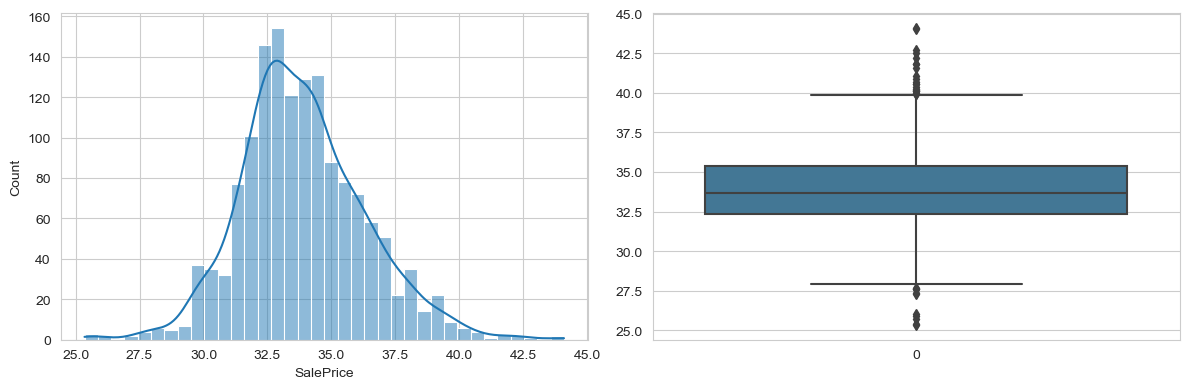

In [63]:
print(df['SalePrice'].describe())
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(df['SalePrice'], kde=True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(df['SalePrice'], ax=axs[1], palette='mako')
plt.tight_layout()

The distribution of the target variable 'SalePrice' is right-skewed. We will transform this variable to make it more normally distributed.

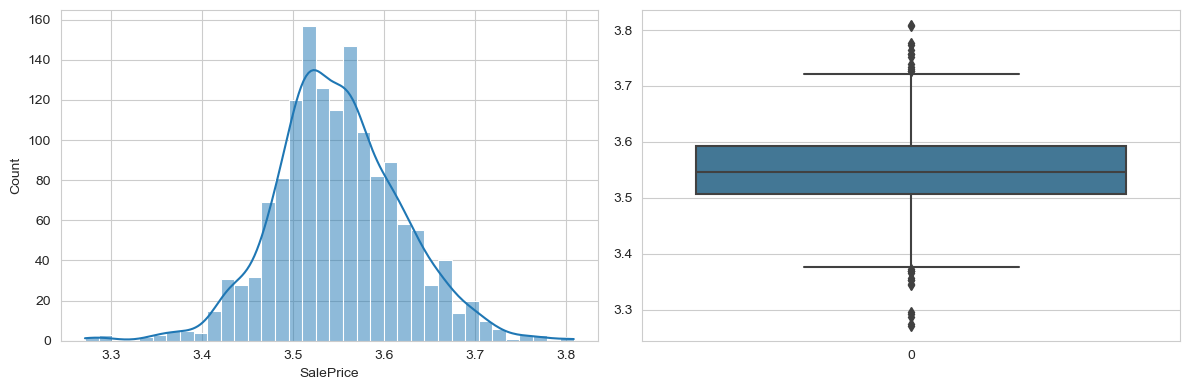

In [64]:
df['SalePrice'] = np.log1p(df['SalePrice'])
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(df['SalePrice'], kde=True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(df['SalePrice'], ax=axs[1], palette='mako')
plt.tight_layout()

# Categorical Variables

Extract dataset with only categorical variables for data visualization.

In [65]:
categorical_df = df.select_dtypes(include=['object']).copy()
categorical_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,No,No,No,0,12,2008,WD,Normal


Categorical variables view with bar charts:

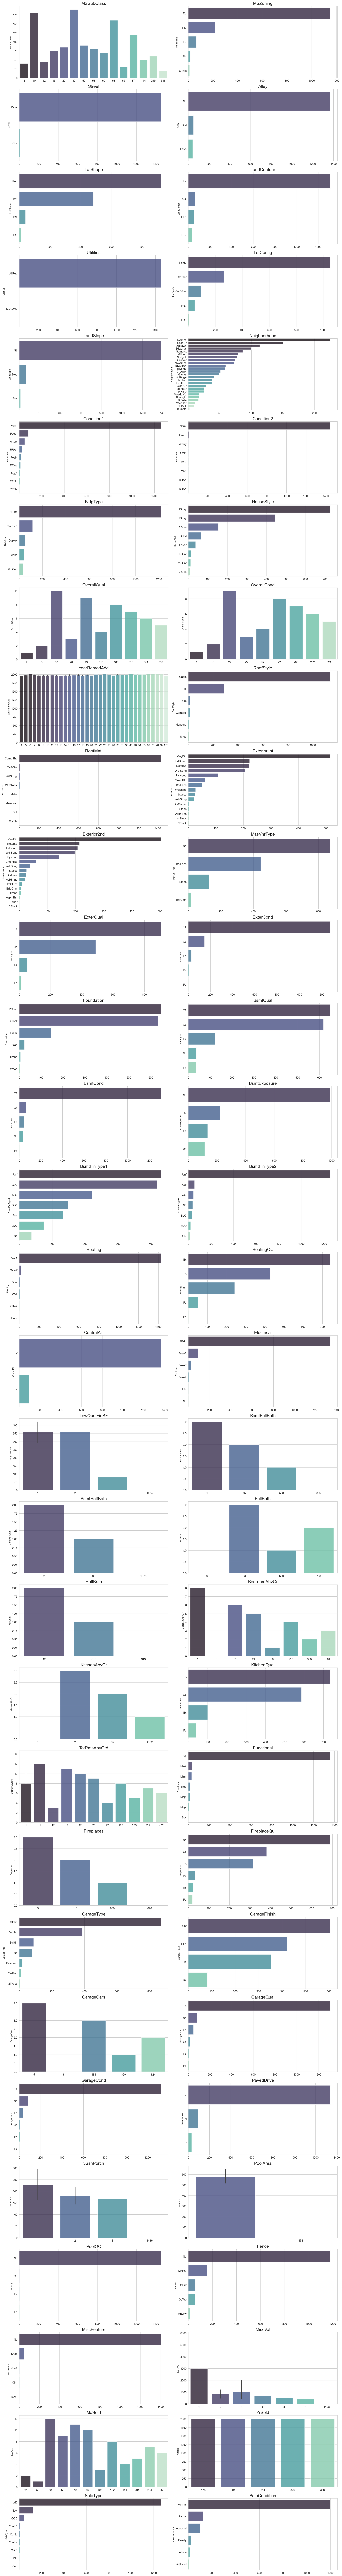

In [66]:
num_plot = len(categorical_df.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 150))

if isinstance(axes, np.ndarray):
    list_axes = list(axes.flat)
else:
    list_axes = [axes]

for index, col in enumerate(categorical_df.columns):
    df_count = df[col].value_counts()

    if (df_count.index.dtype == np.int64):
        df_count.index = map(str, df_count.index)

    sns.barplot(ax=list_axes[index], x=df_count.values, y=df_count.index, alpha=0.8, palette='mako')
    list_axes[index].set_title(col, fontsize=18)
    list_axes[index].tick_params(axis="x", labelsize=12)
    list_axes[index].tick_params(axis="y", labelsize=12)

for i in range(num_plot, len(list_axes)):
    list_axes[i].set_visible(False)

fig.tight_layout()
plt.show()

Frequency of categorical variables:

In [67]:
for col in categorical_df.columns:
    temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
    # rename the row base on column description mapping
    if col in column_descriptions:
        temp_df[col] = temp_df[col].map(column_descriptions[col])
    temp_df['frequency'] = round(temp_df['counts'] / len(df) * 100, 2)
    print(temp_df)

                                           MSSubClass  counts  frequency
0                     1-STORY 1946 & NEWER ALL STYLES     536      36.71
1                                2-STORY 1946 & NEWER     299      20.48
2                       1-1/2 STORY FINISHED ALL AGES     144       9.86
3   1-STORY PUD (Planned Unit Development) - 1946 ...      87       5.96
4                                1-STORY 1945 & OLDER      69       4.73
5                          2-STORY PUD - 1946 & NEWER      63       4.32
6                                2-STORY 1945 & OLDER      60       4.11
7                                SPLIT OR MULTI-LEVEL      58       3.97
8                        DUPLEX - ALL STYLES AND AGES      52       3.56
9           2 FAMILY CONVERSION - ALL STYLES AND AGES      30       2.05
10                                        SPLIT FOYER      20       1.37
11                               2-1/2 STORY ALL AGES      16       1.10
12                  1-1/2 STORY - UNFINISHED ALL AG

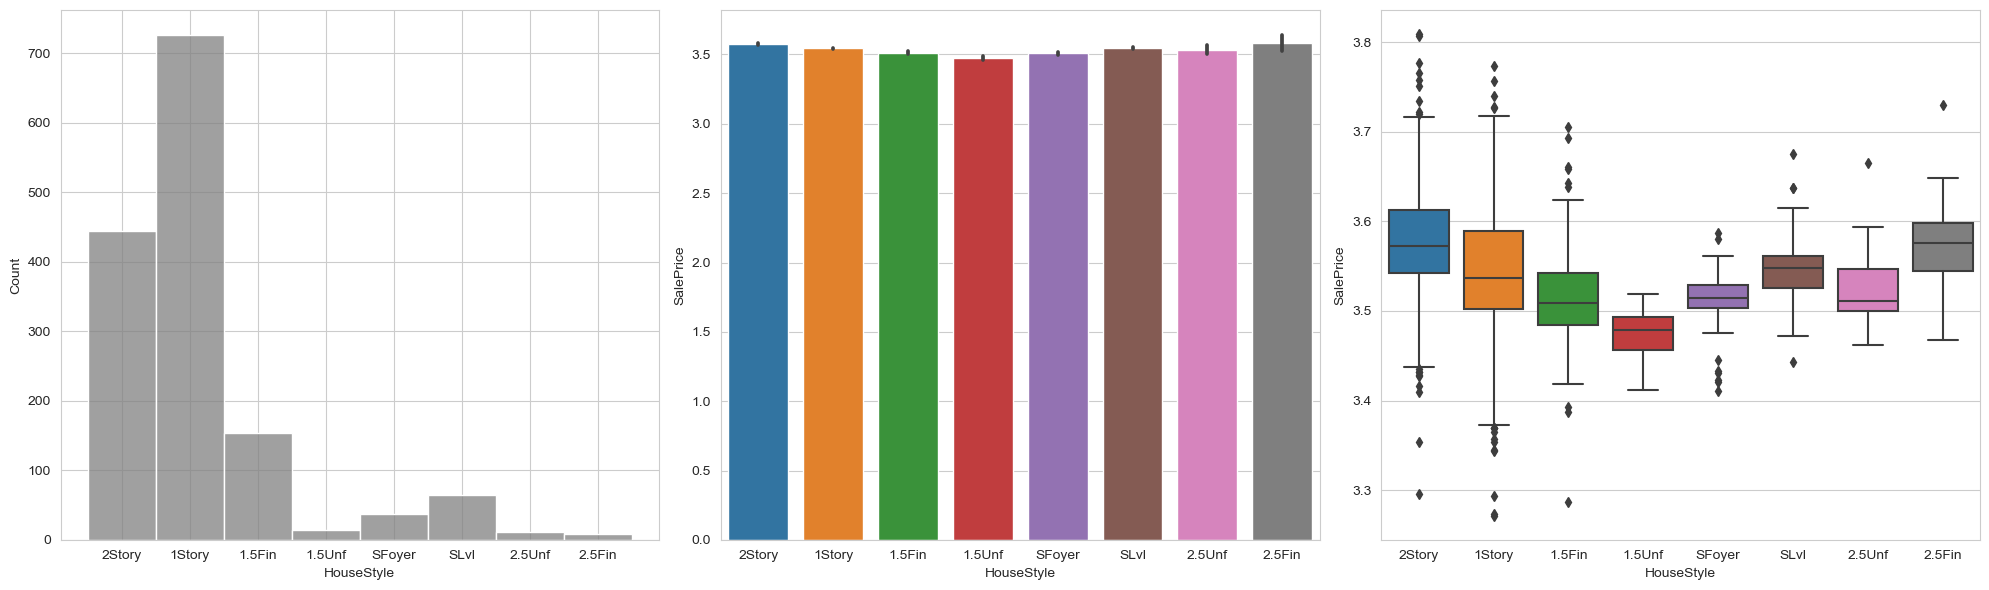

In [68]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))
sns.histplot(x='HouseStyle', data=df, ax=axs[0], color='grey')
sns.barplot(x='HouseStyle', y='SalePrice', data=df, ax=axs[1])
sns.boxplot(x='HouseStyle', y='SalePrice', data=df, ax=axs[2])
plt.tight_layout()

based on the above charts, we can see that the price of 2.5Fin houses is higher than other house styles, but the number of 2.5Fin houses is very low. This can be considered as an outlier.

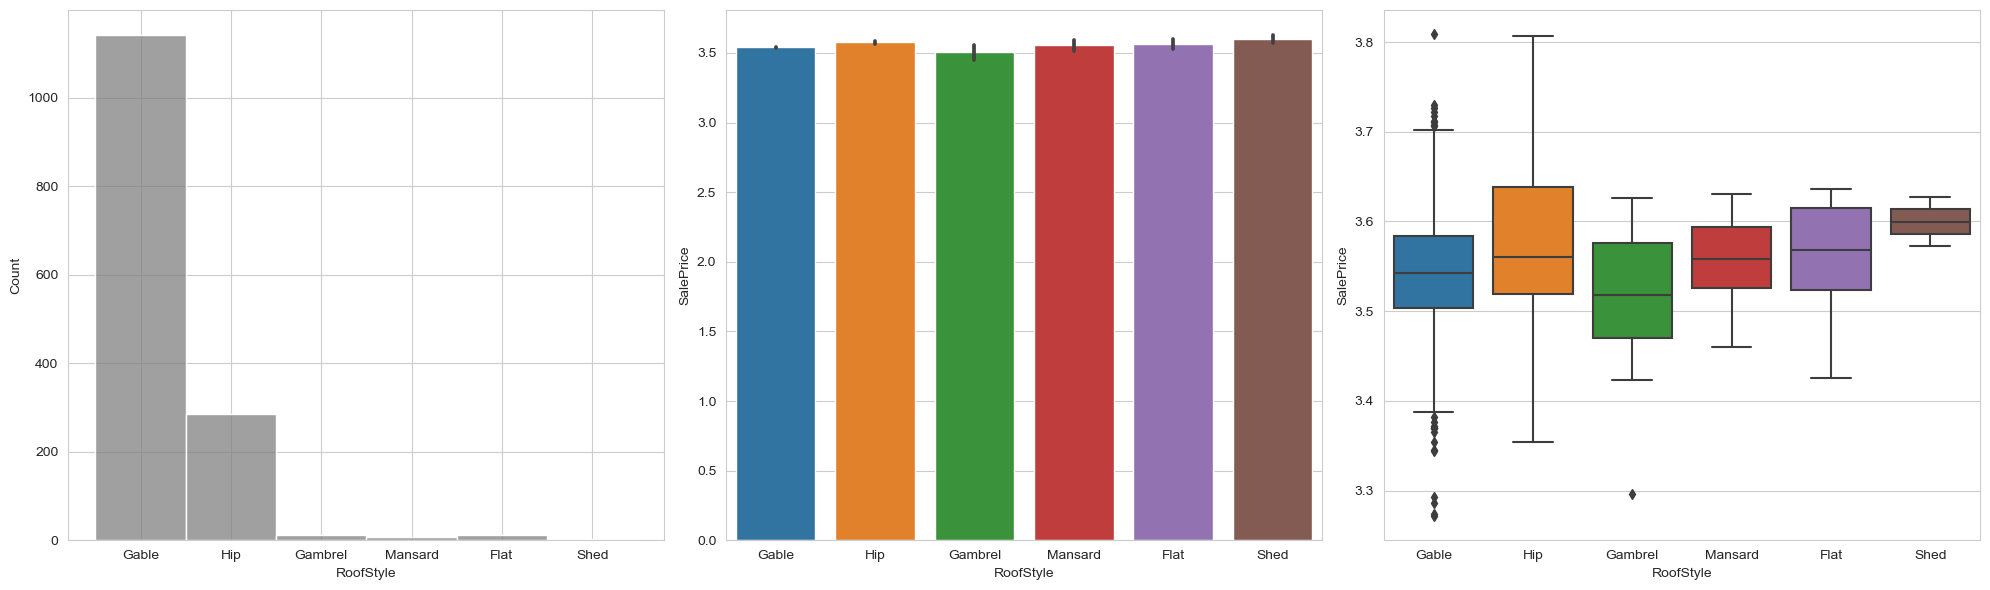

In [69]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))
sns.histplot(x='RoofStyle', data=df, ax=axs[0], color='grey')
sns.barplot(x='RoofStyle', y='SalePrice', data=df, ax=axs[1])
sns.boxplot(x='RoofStyle', y='SalePrice', data=df, ax=axs[2])
plt.tight_layout()

About 75% of the houses have a gable roof style. The price of houses with a hip roof style is higher than other roof styles.The Shed roof style has the highest price, but the number of houses with this style is very low.

-----------------------------------------------------------------------
# Numerical Variables

In [70]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [71]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,TotalSF
0,5.831328,19.212182,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,11.692623,11.686189,13.698888,14.187527,10.506271,0.000000,5.714669,0.000000,0.0,3.588810,14.976591
1,6.221214,19.712205,14.145138,0.000000,12.062832,0.0,8.897844,12.792276,12.792276,0.000000,12.792276,14.145138,10.062098,9.010206,0.000000,0.000000,0.0,3.564711,14.923100
2,5.914940,20.347241,14.184404,7.646538,10.200343,0.0,9.917060,11.892039,11.892039,11.724598,13.832085,14.184404,10.775536,0.000000,5.053371,0.000000,0.0,3.600853,15.149678
3,5.684507,19.691553,14.047529,0.000000,8.274266,0.0,10.468500,11.354094,12.013683,11.354094,13.711364,14.179714,10.918253,0.000000,4.745132,8.797736,0.0,3.519380,14.857121
4,6.314735,21.325160,14.182841,9.391827,10.971129,0.0,10.221051,12.510588,12.510588,12.271365,14.480029,14.182841,11.627708,8.013884,6.314735,0.000000,0.0,3.620235,15.852312


array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>],
       [<Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'TotalSF'}>, <Axes: >]], dtype=object)

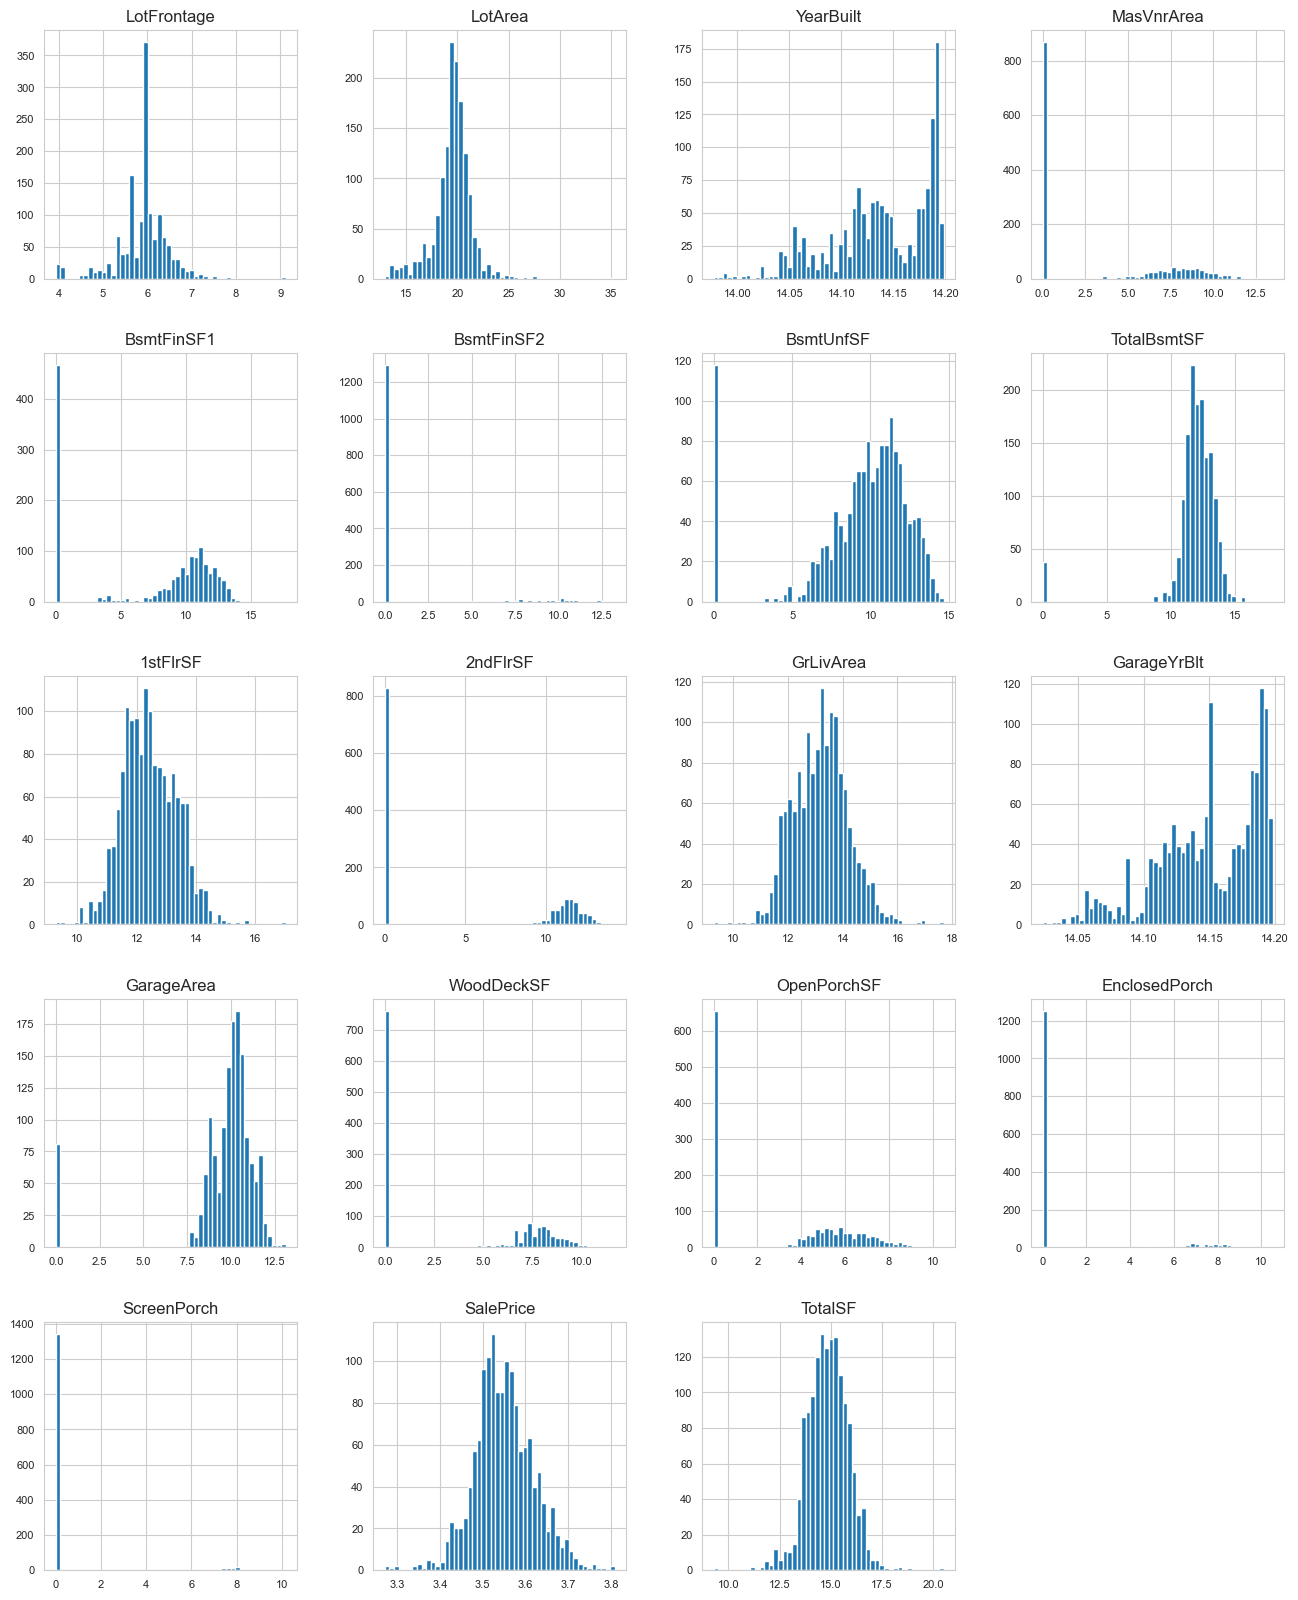

In [72]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Ourlier Detection

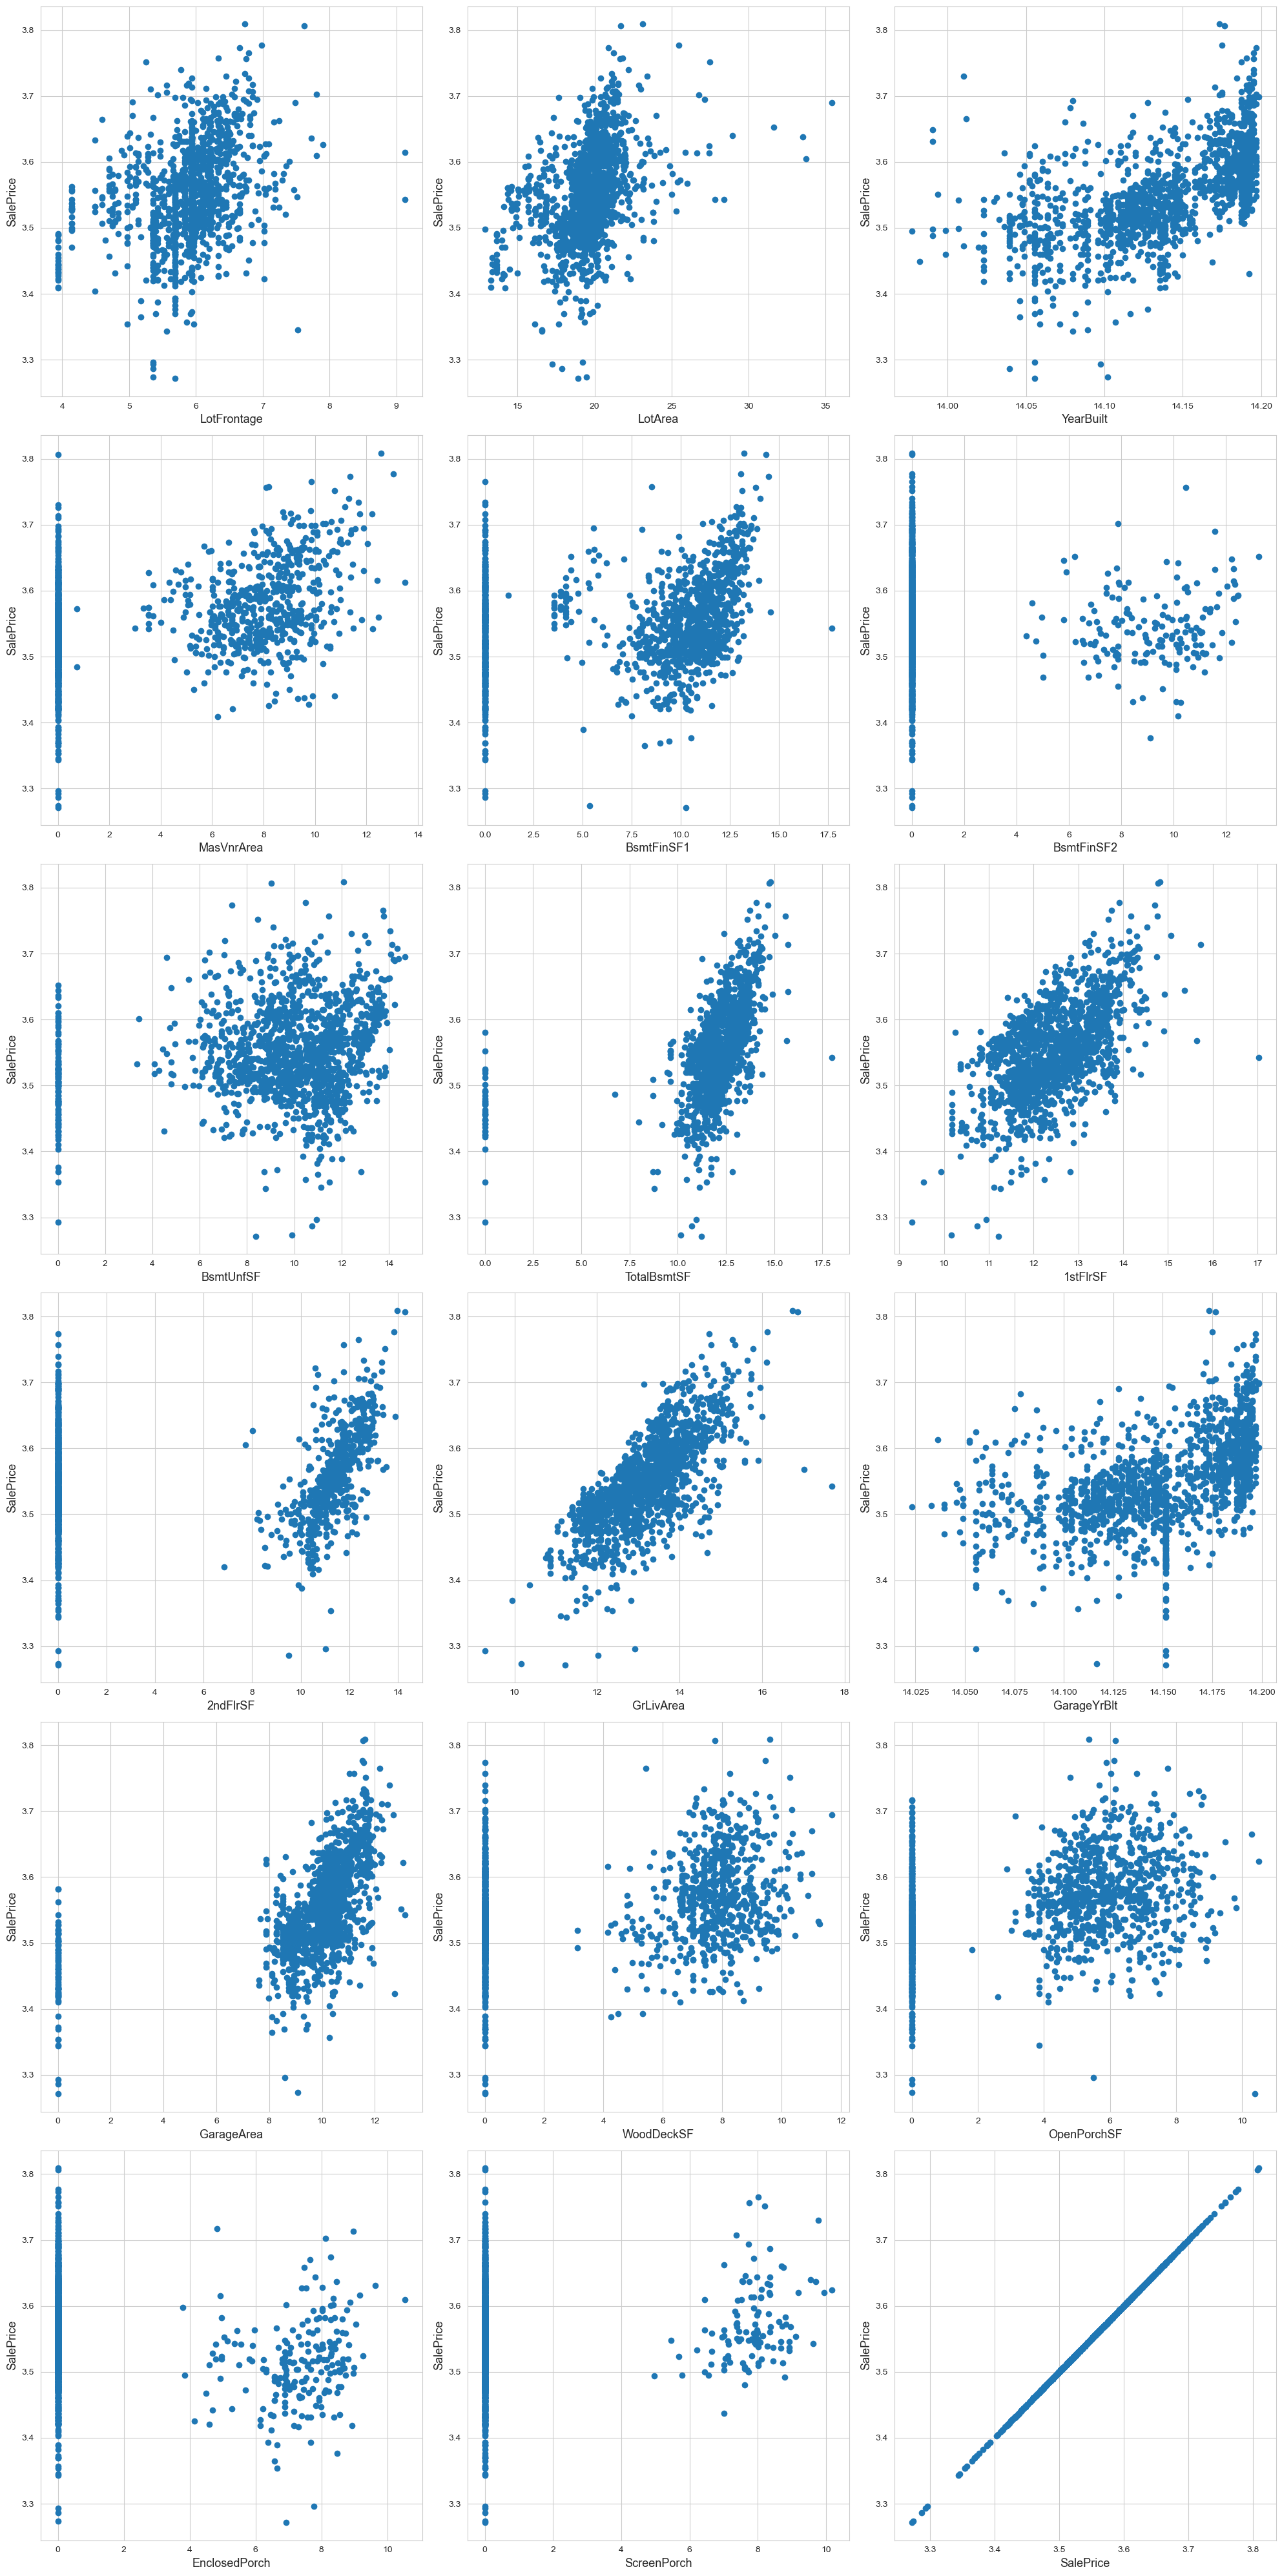

In [73]:
fig, axs = plt.subplots(ncols=3, nrows=df_num.shape[1] // 3, figsize=(20, 40))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, col in enumerate(df_num.columns):
    # Check if we have more columns than subplots
    if i < len(axs):
        axs[i].scatter(x = df_num[col], y = df['SalePrice'])
        axs[i].set_ylabel('SalePrice', fontsize=13)
        axs[i].set_xlabel(col, fontsize=13)

plt.tight_layout()
plt.show()

We can see that there are outliers in some columns. We will handle these outliers in the data preprocessing step.

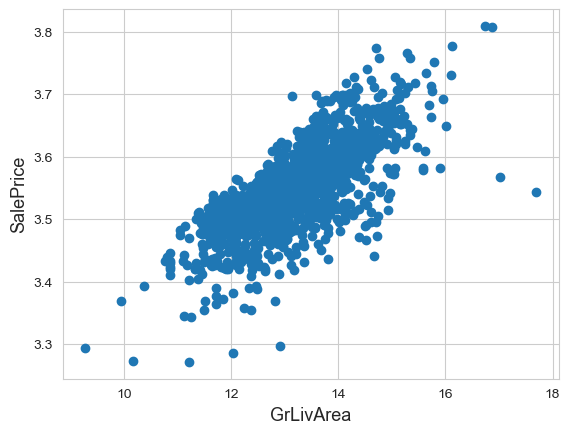

In [74]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)
df_num = df.select_dtypes(include=['float64', 'int64'])


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

there also have outliers in the 'TotalBsmtSF' and '1stFlrSF' columns. But after deleting the outliers of 'GrLivArea', the outliers of 'TotalBsmtSF' and '1stFlrSF' are also deleted.

-----------------------------------------------------------------------
# Correlation Matrix

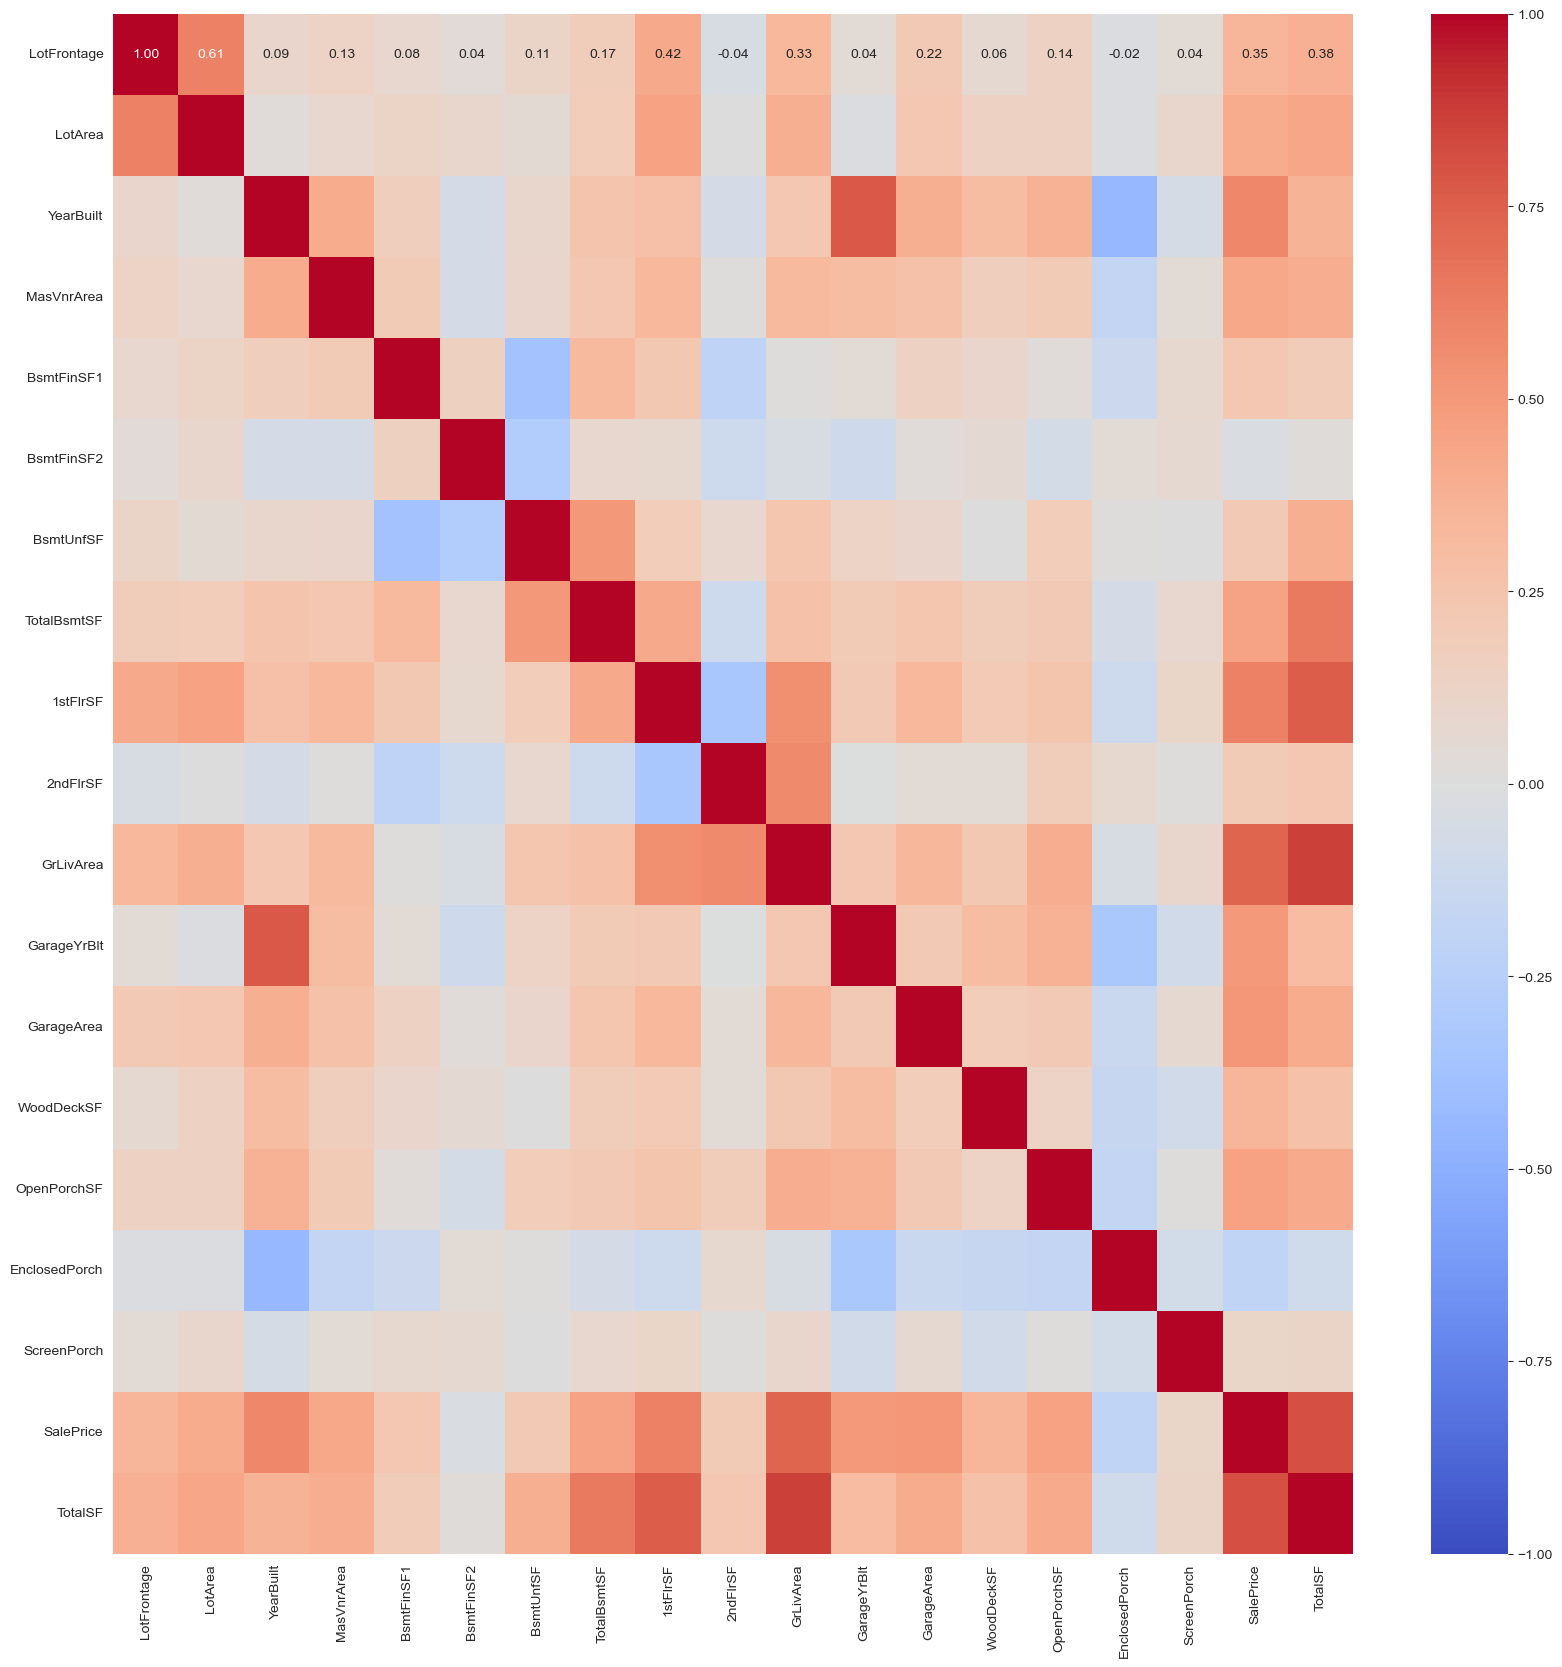

In [75]:
corr = df_num.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [76]:
# df = pd.get_dummies(df)
# df.shape

-----------------------------------------------------------------------
# Modeling

Import librairies


In [77]:

from sklearn.linear_model import ElasticNet, Lasso 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation


In [78]:
# n_folds = 5
# 
# def rmsle_cv(model):
#     rmse= np.sqrt(-cross_val_score(model, df.values, df['SalePrice'], scoring="neg_mean_squared_error", cv = 5))
#     return(rmse)


Base models

LASSO Regression :

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline


In [79]:
# lasso = Lasso(alpha =0.0005, random_state=1).fit(df.values, df['SalePrice'])


Elastic Net Regression :

again made robust to outliers


In [80]:
# ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3).fit(df.values, df['SalePrice'])


Kernel Ridge Regression :


In [81]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5).fit(df.values, df['SalePrice'])


Gradient Boosting Regression :

With huber loss that makes it robust to outliers


In [82]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5).fit(df.values, df['SalePrice'])


XGBoost :
    

In [83]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1).fit(df.values, df['SalePrice'])


Base models scores


In [84]:
# score = rmsle_cv(lasso)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# 
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# 
# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# 
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# 
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [85]:
# class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
# 
#     # we define clones of the original models to fit the data in
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
# 
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)
# 
#         return self

    #Now we do the predictions for cloned models and average them
    # def predict(self, X):
    #     predictions = np.column_stack([
    #         model.predict(X) for model in self.models_
    #     ])
    #     return np.mean(predictions, axis=1)   

In [86]:
# averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
# 
# score = rmsle_cv(averaged_models)
# print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [87]:
# from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np
# import pandas as pd
# 
# # Define classifiers and scalers
# clf_names = ["LinearRegression", "RidgeRegression", "ElasticNet", "Lasso", "GradientBoostingRegressor", "RandomForestRegressor"]
# clfs = [LinearRegression(), Ridge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), RandomForestRegressor()]
# 
# sc_names = ["StandardScaler", "MinMaxScaler", "Normalizer", "RobustScaler"]
# scs = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]
# 
# # Define DataFrameSelector
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names=attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values
# 
# # Define pipelines
# numerics = df.select_dtypes(include=[np.number])
# categoricals = df.select_dtypes(exclude=[np.number])
# 
# numerical_pipeline = Pipeline([
#     ("select_numeric", DataFrameSelector(numerics.columns.to_list())),
#     ("std_scaler", StandardScaler()),
# ])
# 
# categorical_pipeline =  Pipeline([
#     ("select_categoricals", DataFrameSelector(categoricals.columns.to_list())),
#     ("label_encoder", OrdinalEncoder()),
# ])
# 
# def apply_pipeline(scaler, regressor):
#     return Pipeline([
#         ('features', FeatureUnion(transformer_list=[
#             ('num_pipeline', numerical_pipeline),
#             ('cat_pipeline', categorical_pipeline)
#         ])),
#         ('scaler', scaler),
#         ('kbest', SelectKBest(f_regression, k=len(df.columns)-2)),
#         ('regressor', regressor)
#     ])
# 
# # Define metrics
# def compute_rmse(model, X, y):
#     y_pred = model.predict(X)
#     return np.sqrt(mean_squared_error(y, y_pred))
# 
# def compute_rsquared(model, X, y):
#     y_pred = model.predict(X)
#     return r2_score(y, y_pred)
# 
# # Apply pipelines and compute metrics
# result = []
# importance_features = []
# importance_feature_values = []
# for clf_name, clf in zip(clf_names, clfs):
#     for sc_name, sc in zip(sc_names, scs):
#         pipe = apply_pipeline(scaler=sc, regressor=clf)
#         model_fit = pipe.fit(df.values, df['SalePrice'])
# 
#         train_rmse = compute_rmse(model_fit, df.values, df['SalePrice'])
#         test_rmse = compute_rmse(model_fit, df.values, df['SalePrice'])
# 
#         train_rsquared = compute_rsquared(model_fit, df.values, df['SalePrice'])
#         test_rsquared = compute_rsquared(model_fit, df.values, df['SalePrice'])
# 
#         result.append((clf_name, sc_name, train_rmse, test_rmse, train_rsquared, test_rsquared))
# 
#         kbest = pipe.named_steps['kbest'].get_support()
#         importance_features.append([clf_name, sc_name] + list(map(bool, kbest)))
# 
#         temp_if_values = None
#         clf_root = pipe.named_steps['regressor']
#         try:
#             temp_if_values = list(map(str, clf_root.feature_importances_))
#         except Exception as e:
#             try:
#                 temp_if_values = list(map(str, clf_root.coef_))
#             except Exception as e:
#                 pass
# 
#         if temp_if_values:
#             temp_series = pd.Series(data=list(map(bool, kbest)))
#             temp_series[temp_series==True] = temp_if_values
#             temp_series[temp_series==False] = 'Omitted'
#             importance_feature_values.append([clf_name, sc_name] + temp_series.to_list())
# 
# df_result = pd.DataFrame(data=result, columns=["Classifier","Scaler","Train RMSE", "Test RMSE","Train R2", "Test R2"]).sort_values('Test RMSE')
# df_result
# 
# if_headers = ["Classifier", "Scaler"] + df.columns.to_list()
# df_if_values = pd.DataFrame(data=importance_feature_values, columns=if_headers)
# df_if_values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices